In [342]:
# Importing the required packages here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [343]:
#load dataset

df = pd.read_csv('eth_ind.csv')
df.head()

C:\Users\sarad\AppData\Local\Temp\ipykernel_27932\4168895041.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('eth_ind.csv')


,household_id,individual_id,sex,age,age_p,married,form_married,nev_married,disability,religion,...,member_r9,head_r9,respond_r9,relation_r9,relation_os_r9,member_r10,head_r10,respond_r10,relation_r10,relation_os_r10
0,010101088800910007,1,2.0,61.0,NaN,0.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,010101088800910007,2,1.0,27.0,NaN,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,010101088800910007,3,2.0,20.0,NaN,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010101088800910007,5,2.0,11.0,NaN,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010101088800910007,6,1.0,8.0,NaN,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
#clean the data

#keep the needed columns
df = df[['sex','age','married','form_married','disability','religion','literacy','educ','work','member_r0']] 


#drop recordds with missing data
df = df.dropna()

#convert from float to integer
df = df.astype(int)

#rename column to make it understandable
df.rename(columns = {'member_r0':'live_alone'}, inplace = True)
df.rename(columns = {'work':'employed'}, inplace = True)
df.rename(columns = {'educ':'education_level'}, inplace = True)



#rename fields from numbers to make data understandable

df2 = df.copy()

df2['sex'].replace(1,'male',inplace=True)
df2['sex'].replace(2,'female',inplace=True)

df2['married'].replace(0,'no',inplace=True)
df2['married'].replace(1,'yes',inplace=True)

df2['form_married'].replace(0,'no',inplace=True)
df2['form_married'].replace(1,'yes',inplace=True)


df2['disability'].replace(0,'no',inplace=True)
df2['disability'].replace(1,'yes',inplace=True)

df2['literacy'].replace(0,'no',inplace=True)
df2['literacy'].replace(1,'yes',inplace=True)

df2['employed'].replace(0,'no',inplace=True)
df2['employed'].replace(1,'yes',inplace=True)

df2['live_alone'].replace(1,'no',inplace=True)
df2['live_alone'].replace(0,'yes',inplace=True)

df2['religion'].replace(1,'christianity',inplace=True)
df2['religion'].replace(2,'islam',inplace=True)
df2['religion'].replace(3,'other',inplace=True)



df2['education_level'].replace(0,'none',inplace=True)
df2['education_level'].replace(1,'primary',inplace=True)
df2['education_level'].replace(2,'secondary',inplace=True)
df2['education_level'].replace(3,'teriary',inplace=True)





df2.head()

,sex,age,married,form_married,disability,religion,literacy,education_level,employed,live_alone
0,female,61,no,yes,yes,christianity,no,none,no,no
1,male,27,no,yes,no,christianity,yes,primary,yes,no
2,female,20,no,yes,no,christianity,no,primary,yes,no
3,female,11,no,no,no,christianity,no,none,yes,no
6,female,40,no,yes,no,christianity,no,primary,yes,no


Exploring the sort of people who took part in the survey to determine if there was a good mix of responses from different people

In [345]:
#data exploration

#age range of people who took the survey
print('youngest age =', df2['age'].min())
print('oldest age =', df2['age'].max())


youngest age = 10
oldest age = 97


C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Are the people who took the survey married?'}, xlabel='married', ylabel='count'>

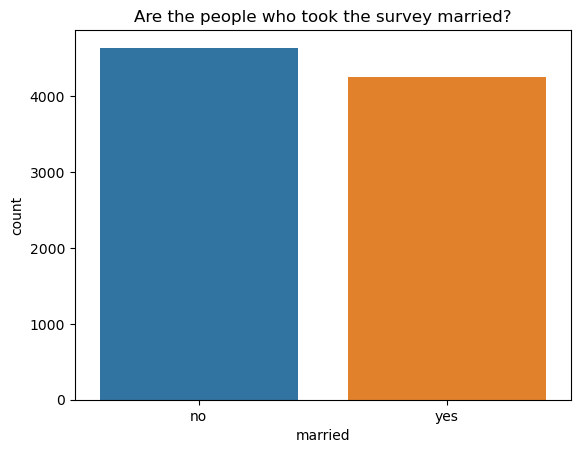

In [346]:
x = df2['married']
plt.title('Are the people who took the survey married?')
sns.countplot(x)

C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'gender of the people who took the survey'}, xlabel='sex', ylabel='count'>

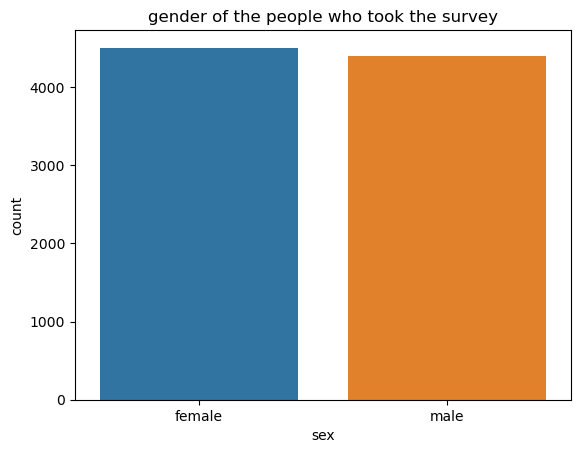

In [347]:
x = df2['sex']
plt.title('gender of the people who took the survey')
sns.countplot(x)

([<matplotlib.patches.Wedge at 0x13144b14940>,
 [Text(0.3341501414283854, 1.048018932550071, 'islam'),
  Text(-0.3764249764552145, -1.0335880403239444, 'christianity'),
  Text(1.099092992175428, -0.044660883901518525, 'other')])

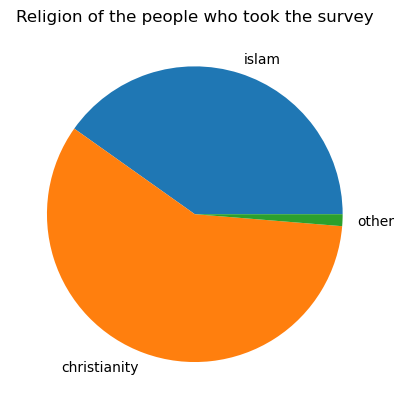

In [348]:
rel_count = df2.religion.value_counts()
religions = ['islam','christianity','other']
count = [rel_count[1],rel_count[0],rel_count[2]]

plt.title('Religion of the people who took the survey')
plt.pie(count,labels=religions)

none         4271
primary      3891
secondary     545
teriary       189
Name: education_level, dtype: int64

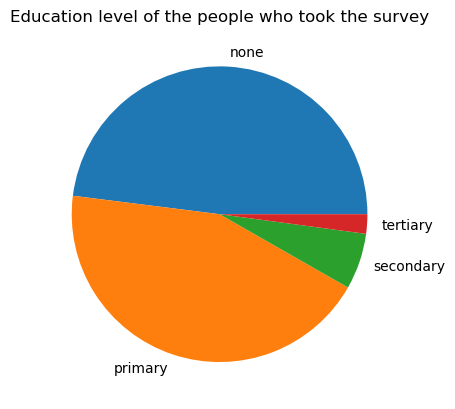

In [349]:
ed_count = df2.education_level.value_counts()
ed_level = ['none','primary','secondary','tertiary']
count = [ed_count[0],ed_count[1],ed_count[2],ed_count[3]]
plt.title('Education level of the people who took the survey')
plt.pie(ed_count,labels=ed_level)
ed_count

C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Could the people who took the survey read?'}, xlabel='literacy', ylabel='count'>

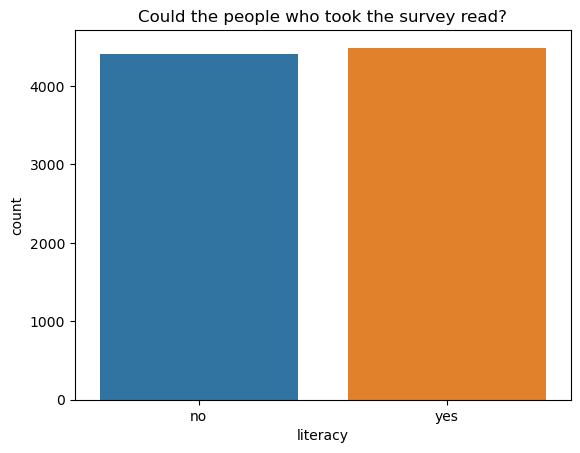

In [350]:
x = df2['literacy']
plt.title('Could the people who took the survey read?')
sns.countplot(x)

C:\Users\sarad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Were the people who took the survey employed?'}, xlabel='employed', ylabel='count'>

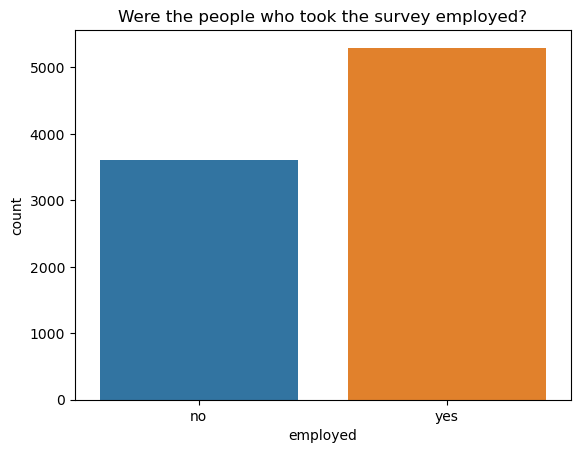

In [351]:
x = df2['employed']
plt.title('Were the people who took the survey employed?')
sns.countplot(x)

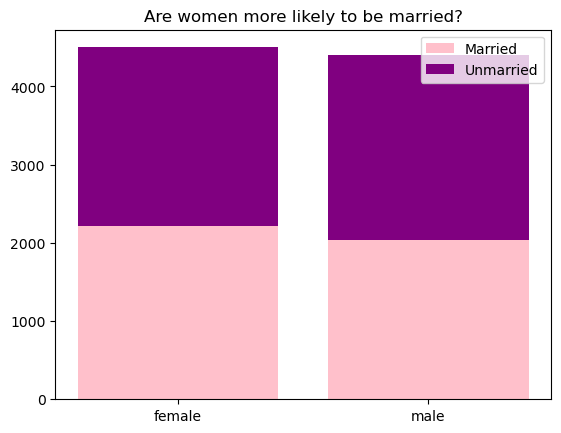

In [352]:
#Exploring marriage and gender

df_male = df2[df2.sex == 'male']
df_female = df2[df2.sex == 'female']

df_female_married = df_female['married']
df_male_married = df_male['married']

female_married = df_female_married[df_female_married =='yes'].count()
female_unmarried = df_female_married[df_female_married =='no'].count()
male_married = df_male_married[df_male_married =='yes'].count()
male_unmarried = df_male_married[df_male_married =='no'].count()

married = [female_married,male_married]
unmarried = [female_unmarried,male_unmarried]



fig, ax = plt.subplots()

x=['female','male']

ax.bar(x,married,label='Married',color='pink')
ax.bar(x,unmarried,bottom=married,
       label='Unmarried',color='purple')
ax.set_title('Are women more likely to be married?')
ax.legend()
                  




([<matplotlib.patches.Wedge at 0x13144dbf550>,
 [Text(-0.9746544442950753, 0.5099497173406983, 'female'),
  Text(0.9746544204226051, -0.5099497629675652, 'male')])

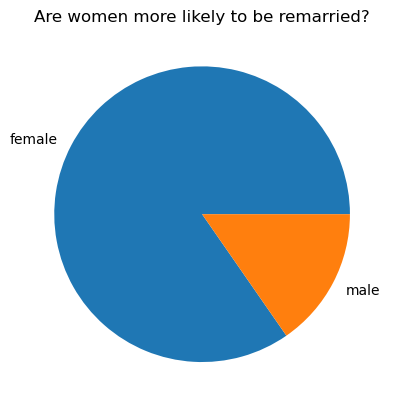

In [353]:
#are men more likely to be remarried than women

df_female_remarried = df_female['form_married']
df_male_remarried = df_male['form_married']

female_remarried = df_female_remarried[df_female_remarried =='yes'].count()
male_remarried = df_male_remarried[df_male_remarried =='yes'].count()

count = [female_remarried, male_remarried]

plt.title('Are women more likely to be remarried?')
plt.pie(count,labels=x)


([<matplotlib.patches.Wedge at 0x13144e04550>,
 [Text(0.33271193859148784, 1.048476402175411, 'female'),
  Text(-0.33271193859148745, -1.0484764021754112, 'male')])

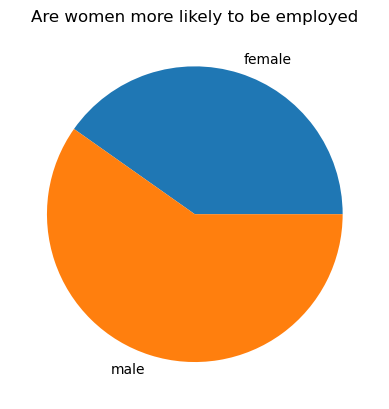

In [354]:
#Are women more likely to be employed than men?

df_female_employed = df_female['employed']
df_male_employed = df_male['employed']

female_employed = df_female_employed[df_female_employed =='yes'].count()
male_employed = df_male_employed[df_male_employed =='yes'].count()

count = [female_employed, male_employed]

plt.title('Are women more likely to be employed')
plt.pie(count,labels=x)


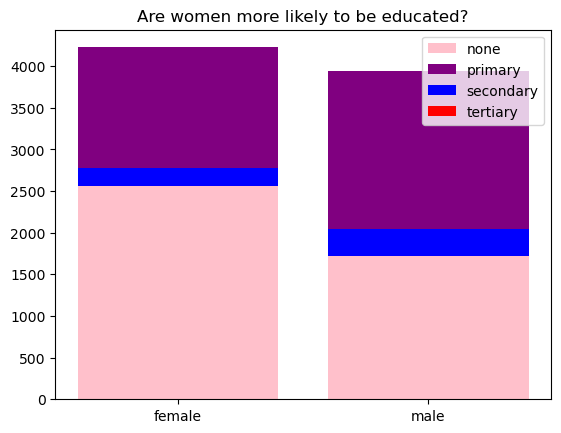

In [355]:
#Are women more likely to have a higher education

df_female_education = df_female['education_level']
df_male_education = df_male['education_level']

female_primary = df_female_education[df_female_education =='primary'].count()
female_secondary = df_female_education[df_female_education =='secondary'].count()
female_tertiary = df_female_education[df_female_education =='tertiary'].count()
female_none = df_female_education[df_female_education =='none'].count()

male_primary = df_male_education[df_male_education =='primary'].count()
male_secondary = df_male_education[df_male_education =='secondary'].count()
male_tertiary = df_male_education[df_male_education =='tertiary'].count()
male_none = df_male_education[df_male_education =='none'].count()


primary = [female_primary,male_primary]
secondary = [female_secondary,male_secondary]
tertiary = [female_tertiary,male_tertiary]
none = [female_none,male_none]



fig, ax = plt.subplots()



ax.bar(x,none,label='none',color='pink')
ax.bar(x,primary,bottom=none,label='primary',color='purple')
ax.bar(x,secondary,bottom=none,label='secondary',color='blue')
ax.bar(x,tertiary,bottom=none,label='tertiary',color='red')

ax.set_title('Are women more likely to be educated?')
ax.legend()

([<matplotlib.patches.Wedge at 0x13145124a00>,
 [Text(0.3388934773266652, 1.0464947257513728, 'female'),
  Text(-0.3388934773266656, -1.0464947257513728, 'male')])

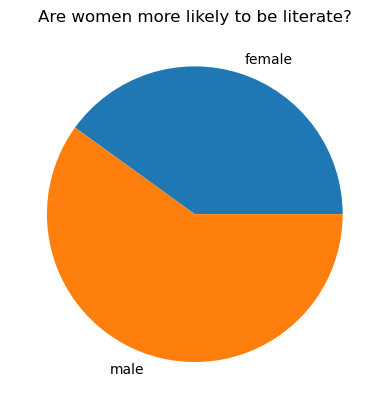

In [356]:
#are women more likely to be literate?


df_female_literate = df_female['literacy']
df_male_literate = df_male['literacy']

female_literate = df_female_literate[df_female_literate =='yes'].count()
male_literate = df_male_literate[df_male_literate =='yes'].count()

count = [female_literate, male_literate]

plt.title('Are women more likely to be literate?')
plt.pie(count,labels=x)

([<matplotlib.patches.Wedge at 0x13146610790>,
 [Text(-0.02019880009994845, 1.0998145336712561, 'female'),
  Text(0.020198697127879636, -1.0998145355623994, 'male')])

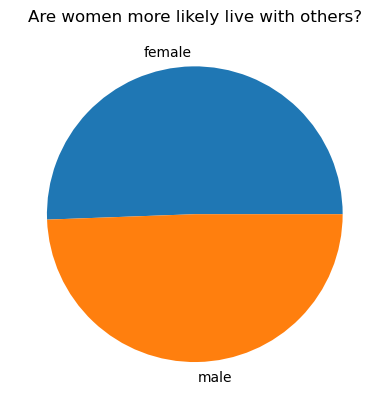

In [358]:
df_female_livealone = df_female['live_alone']
df_male_livealone = df_male['live_alone']

female_livealone = df_female_livealone[df_female_livealone =='no'].count()
male_livealone = df_male_livealone[df_male_livealone =='no'].count()

count = [female_livealone, male_livealone]

plt.title('Are women more likely live with others?')
plt.pie(count,labels=x)

<AxesSubplot:>

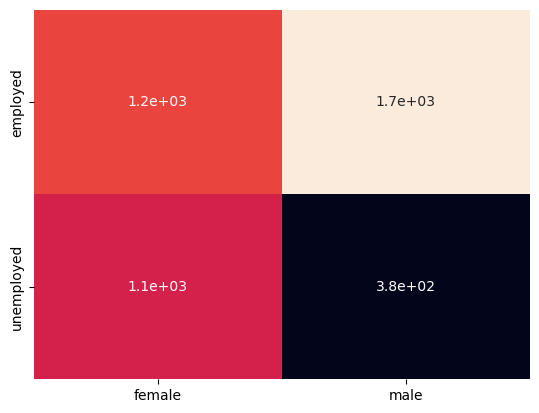

In [359]:
#are married people less likely to be employed?


df_female_m_employ = df_female[['employed','married']]
df_male_m_employ = df_male[['employed','married']]

female_mar = df_female_m_employed[df_female_m_employed.married =='yes']
female_mar_emp = female_mar[female_mar.employed =='yes'].count()
female_mar_unemp = female_mar[female_mar.employed =='no'].count()

male_mar = df_male_m_employed[df_male_m_employed.married =='yes']
male_mar_emp = male_mar[male_mar.employed =='yes'].count()
male_mar_unemp = male_mar[male_mar.employed =='no'].count()

female = {'employed':female_mar_emp[1],'unemployed':female_mar_unemp[1]}
male = {'employed':male_mar_emp[1],'unemployed':male_mar_unemp[1]}
count = {'female':female,'male':male}

emp_df = pd.DataFrame(count,columns=['female','male'])

sns.heatmap(emp_df,annot=True,cbar=False)



